# [线性回归](https://zh-v2.d2l.ai/chapter_linear-networks/linear-regression.html)


## 线性回归的基本元素
### 线性模型
- 线性模型是指输入特征的线性函数，对于回归问题，线性模型的输出是输入特征的加权和
- 对于分类问题，线性模型的输出是输入特征的加权和的概率分布
- 当我们输入包含d个特征时，我们将预测结果表示为
    - $y  = w_1x_1 + w_2x_2 + ... + w_dx_d + b$
- 将所有特征放在向量x中，将所有权重放在向量w中，我们可以用点积形式简洁地表达模型
    - $y = w^Tx + b$
- 向量x对应于单个数据样本的特征。用符号表示的矩阵$X\in R^{n\times d}$可以很方便地引用我们整个数据集的n个样本。其中X的每一行是一个样本，每一列是一种特征
- 向量w对应于每个特征，b对应于偏置参数
- 在机器学习中，我们通常使用向量表示一组值，而不是单独的标量。这样，我们的模型参数可以写成单个矩阵形式
    - $y = Xw + b$

### 损失函数
*损失函数*（loss function）能够量化目标的*实际*值与*预测*值之间的差距。
通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。
回归问题中最常用的损失函数是平方误差函数。
当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些
（因为当我们对损失函数求导后常数系数为1）。
由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。
为了进一步说明，来看下面的例子。
我们为一维情况下的回归问题绘制图像，如所示。

![img.png](img/img.png)

由于平方误差函数中的二次方项，
估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。
为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），
这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 解析解
在一些简单的情况下，我们可以通过求导数并找到最小值来直接解算上面的最优化问题。
这类解叫做*解析解*（analytical solution）。
然而，大多数深度学习模型并没有解析解，必须使用*数值优化*（numerical optimization）的方法来获得模型参数的近似解。
将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。
我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。
将损失关于$\mathbf{w}$的导数设为0，得到解析解：

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

## 随机梯度下降
本书中我们用到一种名为*梯度下降*（gradient descent）的方法，
这种方法几乎可以优化所有深度学习模型。
它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）
关于模型参数的导数（在这里也可以称为梯度）。
但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。
因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，
这种变体叫做*小批量随机梯度下降*（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，
它是由固定数量的训练样本组成的。
然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：
（1）初始化模型参数的值，如随机初始化；
（2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。
对于平方损失和仿射变换，我们可以明确地写成如下形式:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

公式中的$\mathbf{w}$和$\mathbf{x}$都是向量。
在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。
$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
$\eta$表示*学习率*（learning rate）。
批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。

这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
*调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），
我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。
但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。
因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。
但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。
深度学习实践者很少会去花费大力气寻找这样一组参数，使得在*训练集*上的损失达到最小。
事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，
这一挑战被称为*泛化*（generalization）。

## 向量化加速

In [1]:
import torch
from time import time
import numpy as np
import math
from d2l import torch as d2l

$/alpha$

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
class Timer:
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        self.tik = time()
    def stop(self):
        self.times.append(time() - self.tik)
        return self.times[-1]
    def avg(self):
        return sum(self.times) / len(self.times)
    def sum(self):
        return sum(self.times)
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.05412 sec'

In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00012 sec'

## 正态分布与平方损失

正态分布概率密度函数：
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2) # 标准差为sigma的正态分布的概率密度函数 sqrt开根号
    return p * np.exp(- 0.5 / sigma ** 2 * (x - mu) ** 2) # 概率密度函数 exp指数函数

In [7]:
x = np.arange(-7, 7, 0.01)
x

array([-7.  , -6.99, -6.98, ...,  6.97,  6.98,  6.99])

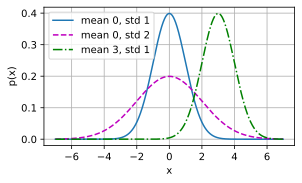

In [8]:
params = [(0, 1), (0, 2), (3, 1)] # 均值和方差
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params]) 

改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是：
我们假设了观测中包含噪声，其中噪声服从正态分布。
噪声正态分布如下式:

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）：

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的*似然*最大的值：

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

根据极大似然估计法选择的估计量称为*极大似然估计量*。
虽然使许多指数函数的乘积最大化看起来很困难，
但是我们可以在不改变目标的前提下，通过最大化似然对数来简化。
由于历史原因，优化通常是说最小化而不是最大化。
我们可以改为*最小化负对数似然*$-\log P(\mathbf y \mid \mathbf X)$。
由此可以得到的数学公式是：

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项，
因为第一项不依赖于$\mathbf{w}$和$b$。
现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。
幸运的是，上面式子的解并不依赖于$\sigma$。
因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。



## 练习

1. 假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。
    1. 找到最优值$b$的解析解。
    1. 这个问题及其解与正态分布有什么关系?

解：
- 首先，最优值的b满足$\frac{d\sum_i(x_i - b)^2}{db}=0$求b的导数：
接着，可以将左边的式子进行化简：
$$ \begin{aligned} \displaystyle \frac{d \sum_i (x_i - b)^2}{d b}&=2\sum_i (x_i - b)\ &= 2(\sum_i x_i -nb)\ &= 2 n (\bar{x}-b)

\end{aligned} $$   $\bar{x}$是$x_1, \ldots, x_n$的平均值.因此当且仅当$b = \bar{x}$时，$\sum_i (x_i - b)^2$最小
1. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。
    1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    1. 计算损失对$w$的梯度。
    1. 通过将梯度设为0、求解矩阵方程来找到解析解。
    1. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
1. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$
    1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
    1. 请试着写出解析解。
    1. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。


# 实现线性回归

In [9]:
import random

## 生成数据集

为了简单起见，我们将[**根据带有噪声的线性模型构造一个人造数据集。**]
我们的任务是使用这个有限样本的数据集来恢复这个模型的参数。
我们将使用低维数据，这样可以很容易地将其可视化。
在下面的代码中，我们生成一个包含1000个样本的数据集，
每个样本包含从标准正态分布中采样的2个特征。
我们的合成数据集是一个矩阵$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$。

我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

$\epsilon$可以视为模型预测和标签时的潜在观测误差。
在这里我们认为标准假设成立，即$\epsilon$服从均值为0的正态分布。
为了简化问题，我们将标准差设为0.01。
下面的代码生成合成数据集。

In [10]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # 噪声
    return X, y.reshape((-1, 1)) 

In [11]:
true_w = torch.tensor([2, -3.4])    
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) 
'''
注意，[`features`中的每一行都包含一个二维数据样本，
`labels`中的每一行都包含一维标签值（一个标量）]。
'''
print('features:', features[0], '\nlabel:', labels[0]), true_w, true_b

features: tensor([ 1.5642, -0.5363]) 
label: tensor([9.1451])


(None, tensor([ 2.0000, -3.4000]), 4.2)

In [64]:
features[:, 1].shape, labels.shape

(torch.Size([1000]), torch.Size([1000, 1]))

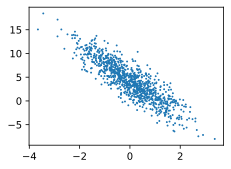

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

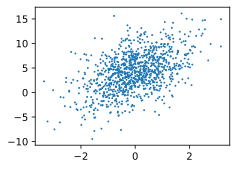

In [65]:
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

计算过程：

In [67]:
a = torch.normal(0, 1, (1, 2))
b = torch.matmul(a, torch.tensor([2, -3.4])) + 4.2
a, b

(tensor([[0.8261, 0.4786]]), tensor([4.2248]))

In [68]:
b += torch.normal(0, 0.01, b.shape)
b, b.reshape((-1, 1))

(tensor([4.2091]), tensor([[4.2091]]))

## 读取数据集
取第一个小批量数据样本并打印。
每个批量的特征维度显示批量大小和输入特征数。
同样的，批量的标签形状与`batch_size`相等。

In [14]:
def data_iter(batch_size, features, labels): # 随机读取小批量样本
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features[batch_indices], labels[batch_indices] # yield返回一个生成器

In [15]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0661, -2.2351],
        [ 0.7895, -0.5429],
        [-0.3123,  1.9590],
        [ 2.3110,  0.1250],
        [ 0.4341, -0.2142],
        [-0.1891,  0.1586],
        [ 2.1687,  1.3533],
        [ 0.2299,  0.3999],
        [-0.5168, -1.2305],
        [ 1.6949, -0.3943]]) 
 tensor([[13.9276],
        [ 7.6471],
        [-3.0959],
        [ 8.3951],
        [ 5.8005],
        [ 3.2837],
        [ 3.9377],
        [ 3.2917],
        [ 7.3600],
        [ 8.9252]])


当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。 上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。 例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。 在深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据。

## 初始化模型参数  

In [16]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型
[**定义模型，将模型的输入和参数同模型的输出关联起来。**]
回想一下，要计算线性模型的输出，
我们只需计算输入特征$\mathbf{X}$和模型权重$\mathbf{w}$的矩阵-向量乘法后加上偏置$b$。
注意，上面的$\mathbf{Xw}$是一个向量，而$b$是一个标量。
当我们用一个向量加一个标量时，标量会被加到向量的每个分量上。


In [71]:
def linreg(X, w, b):
    """线性回归模型。"""
    return torch.matmul(X, w) + b  # 矩阵乘法

## [**定义损失函数**]

因为需要计算损失函数的梯度，所以我们应该先定义损失函数。
这里我们使用平方损失函数。
在实现中，我们需要将真实值`y`的形状转换为和预测值`y_hat`的形状相同。


In [18]:
def squared_loss(y_hat, y):# 损失函数
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## [**定义优化算法**]
在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。
接下来，朝着减少损失的方向更新我们的参数。
下面的函数实现小批量随机梯度下降更新。
该函数接受模型参数集合、学习速率和批量大小作为输入。每
一步更新的大小由学习速率`lr`决定。
因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（`batch_size`）
来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [19]:
def sgd(params, lr, batch_size): # 优化算法
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 注意这里更改param时用的param[:] = 
            param.grad.zero_() # 梯度清零

## 训练
概括一下，我们将执行以下循环：

* 初始化参数
* 重复以下训练，直到完成
    * 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

在每个*迭代周期*（epoch）中，我们使用`data_iter`函数遍历整个数据集，
并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。
这里的迭代周期个数`num_epochs`和学习率`lr`都是超参数，分别设为3和0.03。
设置超参数很棘手，需要通过反复试验进行调整。

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [21]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # l是有关小批量X和y的损失
        l.sum().backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机梯度下降迭代模型参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034139
epoch 2, loss 0.000122
epoch 3, loss 0.000048


In [22]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0006,  0.0007], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)


## 练习
1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
1. 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?
1. 能基于[普朗克定律](https://en.wikipedia.org/wiki/Planck%27s_law)使用光谱能量密度来确定物体的温度吗？
1. 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
1. 为什么在`squared_loss`函数中需要使用`reshape`函数？
1. 尝试使用不同的学习率，观察损失函数值下降的快慢。
1. 如果样本个数不能被批量大小整除，`data_iter`函数的行为会有什么变化？

# 线性回归的简洁实现

In [23]:
from torch.utils import data

In [24]:
true_w =  torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features.shape

torch.Size([1000, 2])

## 读取数据集

我们可以[**调用框架中现有的API来读取数据**]。
我们将`features`和`labels`作为API的参数传递，并通过数据迭代器指定`batch_size`。
此外，布尔值`is_train`表示是否希望数据迭代器对象在每个迭代周期内打乱数据。


In [25]:
def load_array(data_arrays, batch_size, is_train=True): # 本函数已保存在d2lzh_pytorch包中方便以后使用
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays) # 将多个tensor按列方向（dim=1）拼接
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [26]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [27]:
next(iter(data_iter))

[tensor([[-0.9668,  0.1634],
         [-1.0886,  0.3948],
         [ 1.2116, -0.9758],
         [ 0.6804, -0.0273],
         [-1.1263,  0.1561],
         [ 0.5852,  0.4517],
         [-0.8096,  0.9792],
         [ 1.1505,  0.0404],
         [-1.3177, -0.0032],
         [-0.9240,  1.9247]]),
 tensor([[ 1.7110],
         [ 0.6851],
         [ 9.9518],
         [ 5.6499],
         [ 1.4157],
         [ 3.8351],
         [-0.7362],
         [ 6.3653],
         [ 1.5691],
         [-4.1653]])]

## 定义模型
对于标准深度学习模型，我们可以[**使用框架的预定义好的层**]。这使我们只需关注使用哪些层来构造模型，而不必关注层的实现细节。
我们首先定义一个模型变量`net`，它是一个`Sequential`类的实例。
`Sequential`类将多个层串联在一起。
当给定输入数据时，`Sequential`实例将数据传入到第一层，
然后将第一层的输出作为第二层的输入，以此类推。
在下面的例子中，我们的模型只包含一个层，因此实际上不需要`Sequential`。
但是由于以后几乎所有的模型都是多层的，在这里使用`Sequential`会让你熟悉“标准的流水线”。

In [28]:
from torch import nn

在PyTorch中，全连接层在`Linear`类中定义。
值得注意的是，我们将两个参数传递到`nn.Linear`中。
第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。

In [29]:
net = nn.Sequential(nn.Linear(2, 1))
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

## 初始化模型参数

In [74]:
net[0].weight.data.normal_(0, 0.01), net[0].bias.data.fill_(0), net[0].weight, net[0].bias, net

TypeError: 'function' object is not subscriptable

## 损失函数 优化算法

In [31]:
loss = nn.MSELoss()

trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## 训练

通过深度学习框架的高级API来实现我们的模型只需要相对较少的代码。
我们不必单独分配参数、不必定义我们的损失函数，也不必手动实现小批量随机梯度下降。
当我们需要更复杂的模型时，高级API的优势将大大增加。
当我们有了所有的基本组件，[**训练过程代码与我们从零开始实现时所做的非常相似**]。

在每个迭代周期里，我们将完整遍历一次数据集（`train_data`），
不停地从中获取一个小批量的输入和相应的标签。
对于每一个小批量，我们会进行以下步骤:

* 通过调用`net(X)`生成预测并计算损失`l`（前向传播）。
* 通过进行反向传播来计算梯度。
* 通过调用优化器来更新模型参数。

为了更好的衡量训练效果，我们计算每个迭代周期后的损失，并打印它来监控训练过程。


In [32]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000241
epoch 2, loss 0.000098
epoch 3, loss 0.000098


In [33]:
w = net[0].weight.data 
print('w的估计误差：', true_w - w.reshape(true_w.shape)) 
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0007,  0.0002])
b的估计误差： tensor([2.3842e-05])


## 练习

1. 如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？
1. 查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失，即
    $$l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \text{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \text{ 其它情况}\end{cases}$$
1. 如何访问线性回归的梯度？


# softmax回归


回归可以用于预测*多少*的问题。
比如预测房屋被售出价格，或者棒球队可能获得的胜场数，又或者患者住院的天数。

事实上，我们也对*分类*问题感兴趣：不是问“多少”，而是问“哪一个”：

* 某个电子邮件是否属于垃圾邮件文件夹？
* 某个用户可能*注册*或*不注册*订阅服务？
* 某个图像描绘的是驴、狗、猫、还是鸡？
* 某人接下来最有可能看哪部电影？

通常，机器学习实践者用*分类*这个词来描述两个有微妙差别的问题：
1. 我们只对样本的“硬性”类别感兴趣，即属于哪个类别；
2. 我们希望得到“软性”类别，即得到属于每个类别的概率。
这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型。

## 分类问题

我们从一个图像分类问题开始。
假设每次输入是一个$2\times2$的灰度图像。
我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$。
此外，假设每个图像属于类别“猫”“鸡”和“狗”中的一个。

接下来，我们要选择如何表示标签。
我们有两个明显的选择：最直接的想法是选择$y \in \{1, 2, 3\}$，
其中整数分别代表$\{\text{狗}, \text{猫}, \text{鸡}\}$。
这是在计算机上存储此类信息的有效方法。
如果类别间有一些自然顺序，
比如说我们试图预测$\{\text{婴儿}, \text{儿童}, \text{青少年}, \text{青年人}, \text{中年人}, \text{老年人}\}$，
那么将这个问题转变为回归问题，并且保留这种格式是有意义的。

但是一般的分类问题并不与类别之间的自然顺序有关。
幸运的是，统计学家很早以前就发明了一种表示分类数据的简单方法：*独热编码*（one-hot encoding）。
独热编码是一个向量，它的分量和类别一样多。
类别对应的分量设置为1，其他所有分量设置为0。
在我们的例子中，标签$y$将是一个三维向量，
其中$(1, 0, 0)$对应于“猫”、$(0, 1, 0)$对应于“鸡”、$(0, 0, 1)$对应于“狗”：

$$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

## 网络结构
为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出。
为了解决线性模型的分类问题，我们需要和输出一样多的*仿射函数*（affine function）。
每个输出对应于它自己的仿射函数。
在我们的例子中，由于我们有4个特征和3个可能的输出类别，
我们将需要12个标量来表示权重（带下标的$w$），
3个标量来表示偏置（带下标的$b$）。
下面我们为每个输入计算三个*未规范化的预测*（logit）：$o_1$、$o_2$和$o_3$。

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

我们可以用神经网络图来描述这个计算过程。
与线性回归一样，softmax回归也是一个单层神经网络。
由于计算每个输出$o_1$、$o_2$和$o_3$取决于
所有输入$x_1$、$x_2$、$x_3$和$x_4$，
所以softmax回归的输出层也是全连接层。

![softmax回归是一种单层神经网络](img/img_1.png)


为了更简洁地表达模型，我们仍然使用线性代数符号。
通过向量形式表达为$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$，
这是一种更适合数学和编写代码的形式。
由此，我们已经将所有权重放到一个$3 \times 4$矩阵中。
对于给定数据样本的特征$\mathbf{x}$，
我们的输出是由权重与输入特征进行矩阵-向量乘法再加上偏置$\mathbf{b}$得到的。

## 全连接层的参数开销


正如我们将在后续章节中看到的，在深度学习中，全连接层无处不在。
然而，顾名思义，全连接层是“完全”连接的，可能有很多可学习的参数。
具体来说，对于任何具有$d$个输入和$q$个输出的全连接层，
参数开销为$\mathcal{O}(dq)$，这个数字在实践中可能高得令人望而却步。
幸运的是，将$d$个输入转换为$q$个输出的成本可以减少到$\mathcal{O}(\frac{dq}{n})$，
其中超参数$n$可以由我们灵活指定，以在实际应用中平衡参数节约和模型有效性


## 练习

1. 我们可以更深入地探讨指数族与softmax之间的联系。
    1. 计算softmax交叉熵损失$l(\mathbf{y},\hat{\mathbf{y}})$的二阶导数。
        1. 
    1. 计算$\mathrm{softmax}(\mathbf{o})$给出的分布方差，并与上面计算的二阶导数匹配。
1. 假设我们有三个类发生的概率相等，即概率向量是$(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$。
    1. 如果我们尝试为它设计二进制代码，有什么问题？
    1. 请设计一个更好的代码。提示：如果我们尝试编码两个独立的观察结果会发生什么？如果我们联合编码$n$个观测值怎么办？
1. softmax是对上面介绍的映射的误称（虽然深度学习领域中很多人都使用这个名字）。真正的softmax被定义为$\mathrm{RealSoftMax}(a, b) = \log (\exp(a) + \exp(b))$。
    1. 证明$\mathrm{RealSoftMax}(a, b) > \mathrm{max}(a, b)$。
    1. 证明$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) > \mathrm{max}(a, b)$成立，前提是$\lambda > 0$。
    1. 证明对于$\lambda \to \infty$，有$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) \to \mathrm{max}(a, b)$。
    1. soft-min会是什么样子？
    1. 将其扩展到两个以上的数字。

[Discussions](https://discuss.d2l.ai/t/1785)


# 图像分类数据集

In [34]:
import torchvision
from torchvision import transforms

d2l.use_svg_display() # 

In [35]:
trans = transforms.ToTensor()
minst_train = torchvision.datasets.FashionMNIST(root="../Deep_data", train=True, transform=trans, download=True)
minst_text = torchvision.datasets.FashionMNIST(root="../Deep_data", train=False, transform=trans, download=True)

In [36]:
len(minst_train), len(minst_text)

(60000, 10000)

In [37]:
minst_train[0][0].shape, minst_train[0][1]

(torch.Size([1, 28, 28]), 9)

In [38]:
def get_fashion_mnist_labels(labels):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    """返回Fashion-MNIST数据集的文本标签。"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
                   'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [39]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize) # 返回一个figure对象和一个子图对象
    axes = axes.flatten() # 将axes展平
    for i, (ax, img) in enumerate(zip(axes, imgs)): # zip将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表
        if torch.is_tensor(img):
            ax.imshow(img.numpy()) # 将tensor转换为numpy
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False) # 不显示坐标轴
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

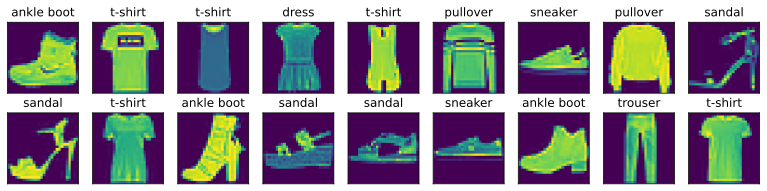

In [40]:
X, y = next(iter(data.DataLoader(minst_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [41]:
batch_size = 256

def get_dataloader_workers():  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    """使用4个进程来读取数据。"""
    return 4

train_iter = data.DataLoader(minst_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [42]:
timer = Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.21 sec'

In [43]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    minst_train = torchvision.datasets.FashionMNIST(root="../Deep_data", train=True, transform=trans, download=True)
    minst_text = torchvision.datasets.FashionMNIST(root="../Deep_data", train=False, transform=trans, download=True)
    return (data.DataLoader(minst_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()), 
            data.DataLoader(minst_text, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

In [44]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


# softmax回归的从零开始实现

In [45]:
import torch
from IPython import display

In [46]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [47]:
num_inputs = 784 # 28 * 28
num_outputs = 10
w = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)
w, b

(tensor([[-1.6319e-02, -1.4819e-02, -1.2677e-02,  ..., -6.6621e-03,
           2.0360e-02,  1.9641e-02],
         [-4.3023e-03, -3.6210e-03, -1.5107e-02,  ..., -7.1284e-03,
          -2.4515e-03, -5.9328e-03],
         [ 5.6171e-03, -8.6657e-03,  1.4493e-03,  ..., -4.9484e-03,
           1.1025e-03, -6.9304e-03],
         ...,
         [-4.7034e-04, -1.2724e-02, -3.6614e-03,  ...,  1.4588e-02,
          -4.1982e-03,  5.2489e-04],
         [ 1.1459e-02,  2.0029e-06, -3.6401e-03,  ...,  1.0248e-02,
           1.7635e-02, -9.9280e-03],
         [ 2.5546e-03, -2.7714e-04, -1.7929e-02,  ...,  3.0833e-03,
           1.2286e-02, -1.0853e-03]], requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

In [48]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
X.sum(dim=0, keepdim=True), X.sum(dim=1, keepdim=True)

(tensor([[5, 7, 9]]),
 tensor([[ 6],
         [15]]))

In [49]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition # 这里应用了广播机制

In [50]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(dim=1)

(tensor([[0.0684, 0.1403, 0.3713, 0.1793, 0.2407],
         [0.0445, 0.1602, 0.1513, 0.3372, 0.3068]]),
 tensor([1., 1.]))

In [51]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, w.shape[0])), w) + b)

In [52]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [53]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

In [54]:
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [55]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # y_hat是矩阵
        y_hat = y_hat.argmax(axis=1) # 返回每一行中最大元素的索引
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [56]:
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval() # 将模型设置为评估模式
    metric = Accumulator(2) # 正确预测数，预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel()) # y.numel()返回y中元素的个数
    return metric[0] / metric[1]

In [57]:
class Accumulator:
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n
        
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
        
    def reset(self):
        self.data = [0.0] * len(self.data)
        
    def __getitem__(self, idx):
        return self.data[idx]

In [58]:
evaluate_accuracy(net, test_iter)

0.116

In [59]:
def train_epoch_ch3(net, train_iter, loss, updater):
    """训练模型一个迭代周期（定义见第3章）。"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确率总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练准确率
    return metric[0] / metric[2], metric[1] / metric[2]

In [60]:
class Animator:
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize) # 返回一个figure对象和一个子图对象
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla() # 清除当前子图
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt) # 绘制图形
        self.config_axes()
        display.display(self.fig) 
        display.clear_output(wait=True)

In [61]:
def train_ch3(net, train_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epochs', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [62]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([w, b], lr, batch_size)

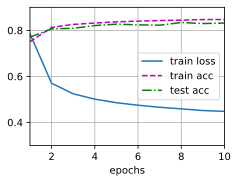

In [63]:
num_epochs = 10
train_ch3(net, train_iter, cross_entropy, num_epochs, updater)